<h1><b>STOCK ANALYSIS & FORECASTING USING RECURRENT NEURONAL NETWORKS

<b>Data:</b> gathered from https://finance.yahoo.com the historical dataset of some tech companies stock performance. Is updated up till the day of doing this project, 12/08/2023

<b>Goal:</b> choose which is the best choice for investing and being able to predict the next days stock closing price of this particular company. Companies we will compare: Alphabet (Google), Apple, Microsoft and Amazon.

<b>Method:</b> descriptive analysis and LSTM model, type of RNN.

<h1><b>Descriptive Analysis

You need to install the yfinance package before running the code. You can do it by running this commented code:

In [ ]:
# !pip install yfinance

In this kind of data, seasonality is much less important than in the energy consumption dataset. Therefore, SARIMA kind of models may not be as efficient. We will try other methods.

In [522]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

yf.pdr_override()

# For time stamps
from datetime import datetime


# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
#we will only keep the last years performance
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)
    

company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
df = pd.concat(company_list, axis=0)
df.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-08-09,139.970001,140.320007,137.100006,137.850006,137.850006,50017300,AMAZON
2023-08-10,139.070007,140.410004,137.490005,138.559998,138.559998,58928400,AMAZON
2023-08-11,137.399994,139.330002,137.000000,138.410004,138.410004,42832100,AMAZON
2023-08-14,138.300003,140.589996,137.750000,140.570007,140.570007,47148700,AMAZON
2023-08-15,140.050003,141.279999,137.229996,137.669998,137.669998,42706600,AMAZON


In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1004 entries, 2022-08-16 to 2023-08-15
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1004 non-null   float64
 1   High          1004 non-null   float64
 2   Low           1004 non-null   float64
 3   Close         1004 non-null   float64
 4   Adj Close     1004 non-null   float64
 5   Volume        1004 non-null   int64  
 6   company_name  1004 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 62.8+ KB


In [524]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1004.000000,1004.000000,1004.000000,1004.000000,1004.000000,1.004000e+03
mean,162.885972,164.879394,161.033174,162.971200,162.610014,4.828678e+07
std,72.665495,73.283791,72.073812,72.685797,72.418871,2.797939e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,8.567800e+06
25%,104.027500,105.751251,103.162498,104.280003,104.280003,2.521582e+07
50%,134.090004,136.120003,132.800003,134.404999,134.063019,4.384830e+07
75%,201.567505,203.774998,199.817497,200.899998,200.301121,6.414465e+07
max,361.750000,366.779999,352.440002,359.489990,359.489990,2.231334e+08


In [525]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,159.386973,161.142351,157.772630,159.497928,158.965406,7.035790e+07
std,18.287257,18.034878,18.559126,18.265232,18.404822,2.366748e+07
min,126.010002,127.769997,124.169998,125.019997,124.488869,3.145820e+07
25%,145.815002,147.340004,144.014999,145.919998,145.274216,5.231420e+07
50%,154.789993,157.089996,153.369995,155.000000,154.394058,6.579930e+07
75%,173.040001,174.044998,171.849998,173.529999,173.056610,8.135480e+07
max,196.240005,198.229996,195.279999,196.449997,196.185074,1.647624e+08


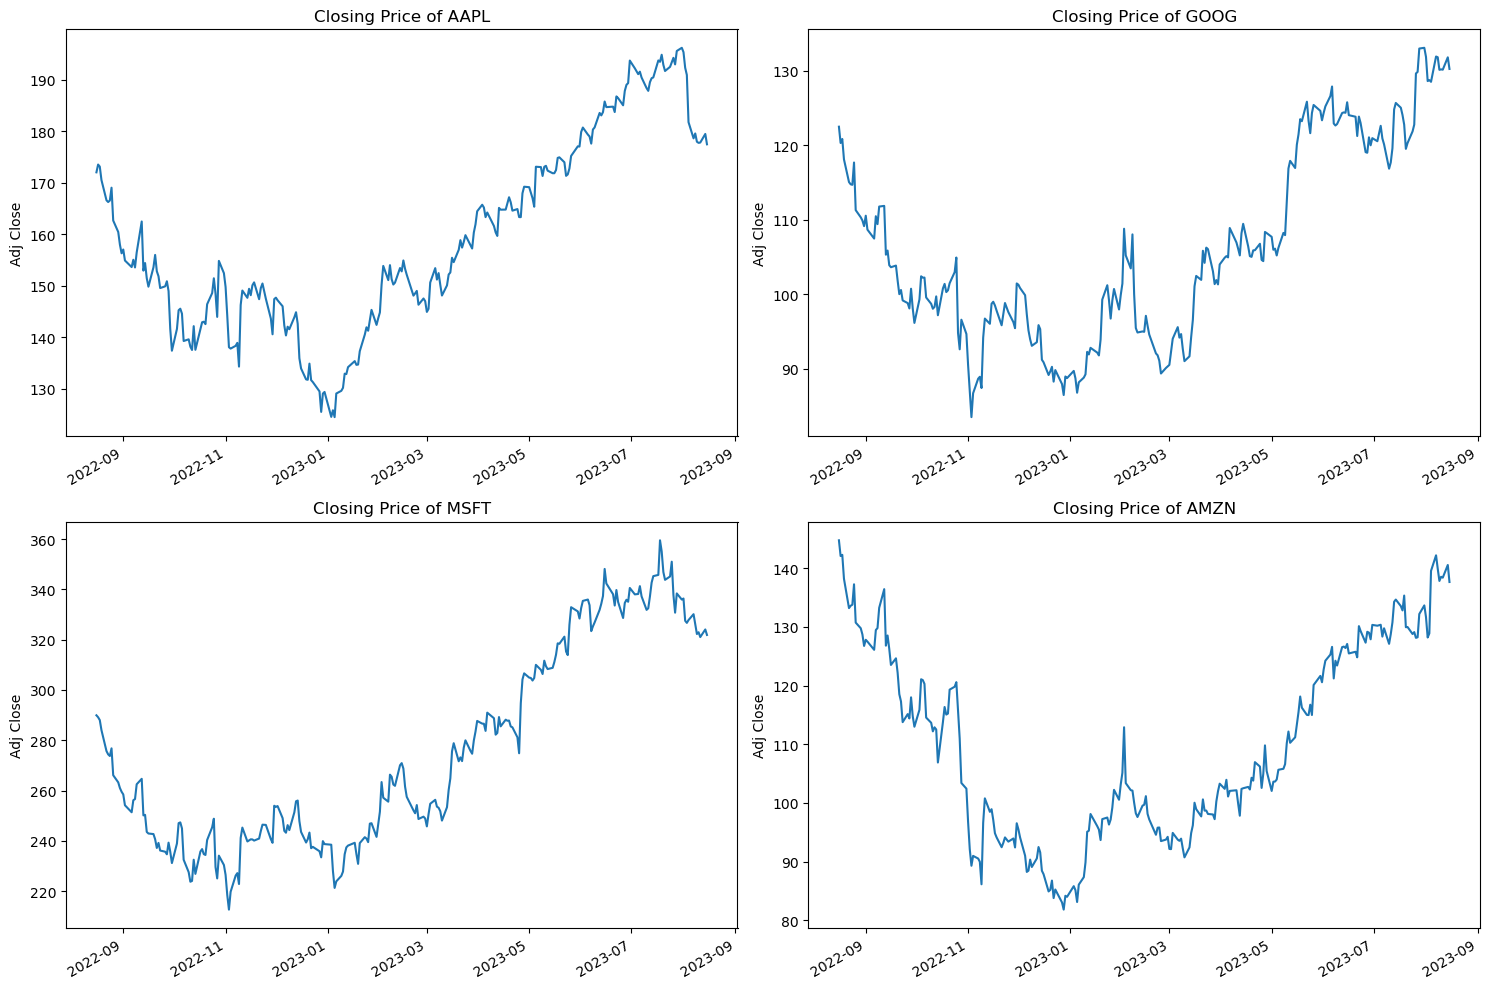

In [526]:
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")
    
plt.tight_layout()

Now we will plot the volumne at each company. This means the amount of shares that have been traded during each day. This could be a symbol of the volatility of an asset.

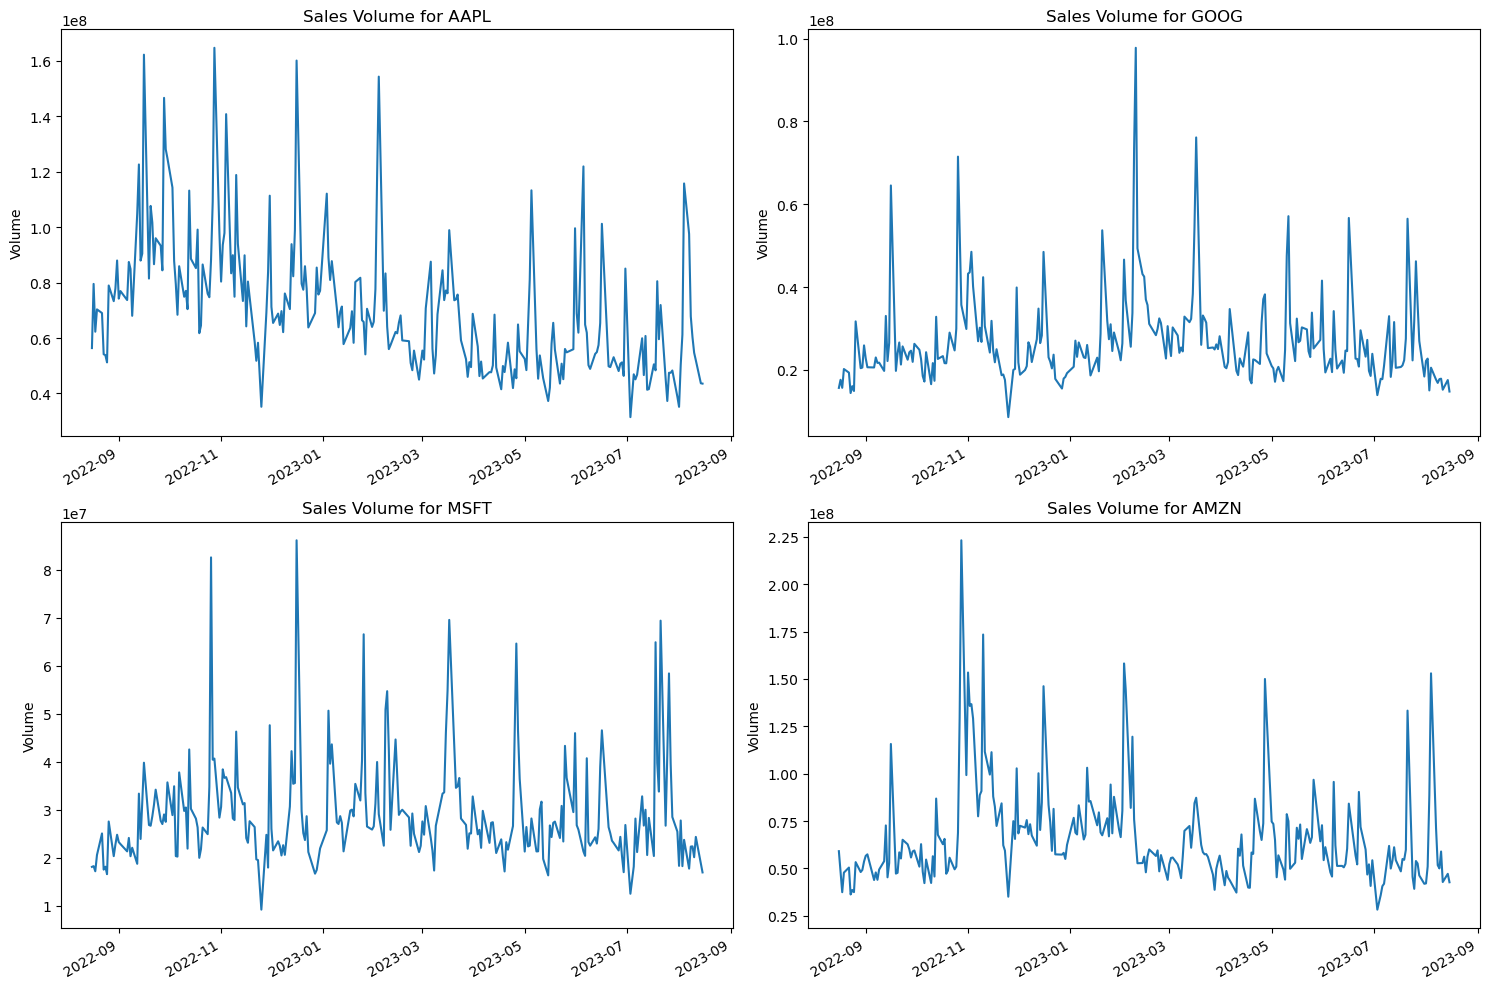

In [527]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")
    
plt.tight_layout()

We will also analyze the percentage change for each day with a histogram. We can easily see how the % change is distributed, more positively or negatively.

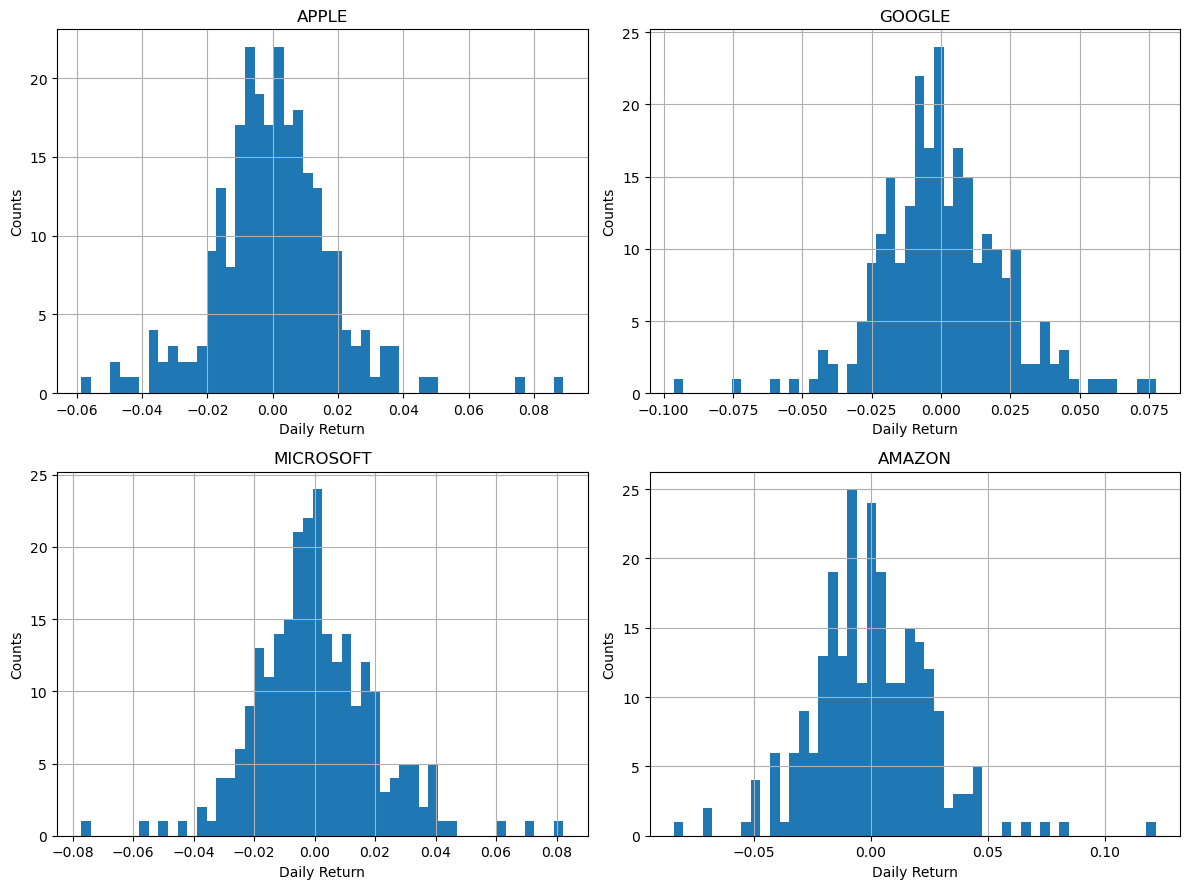

In [530]:
plt.figure(figsize=(12, 9))

for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')
    
plt.tight_layout()

Seems like Amazon and Apple have an attractive right-tail of positive 5 changes, whereas Google left-tailed.

Correlation between the closing prices of the companies?

[*********************100%***********************]  4 of 4 completed


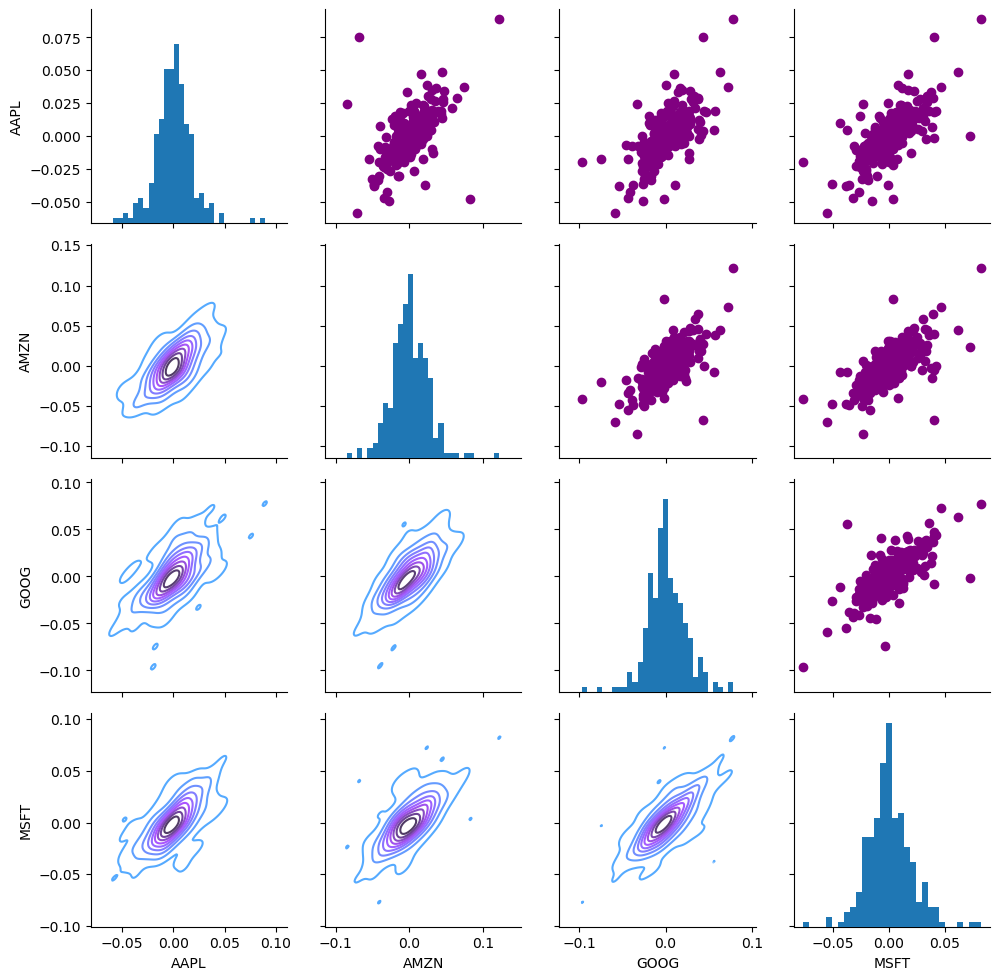

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Lets see it numerically:

Text(0.5, 1.0, 'Correlation of stock closing price')

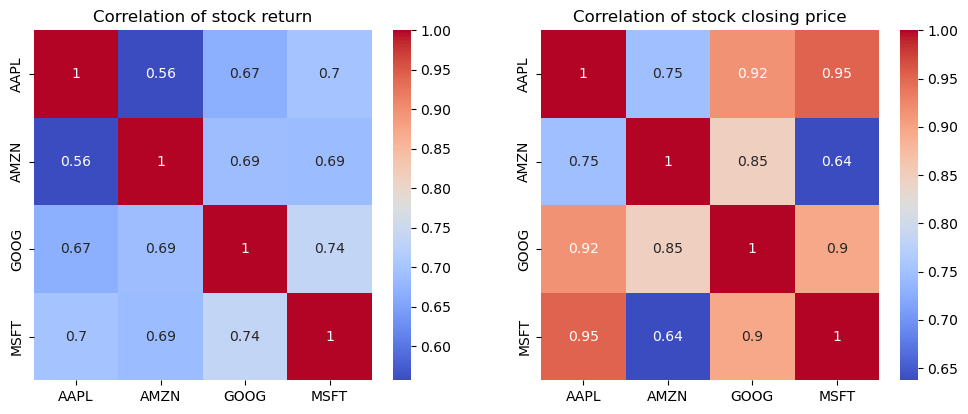

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation of stock closing price')

#keep in mind that this correlation is Pearsons linear Correlation, there are others: Kendall, for example.

Amazon and Apple are the least correlated ones in overall. Microsoft and Apple seem like one of the most correlated ones, as well as Google with Microsoft and Apple.

How risky is to invest at each company? We will quantify this by comparing the expected return with the standard deviation of the daily returns

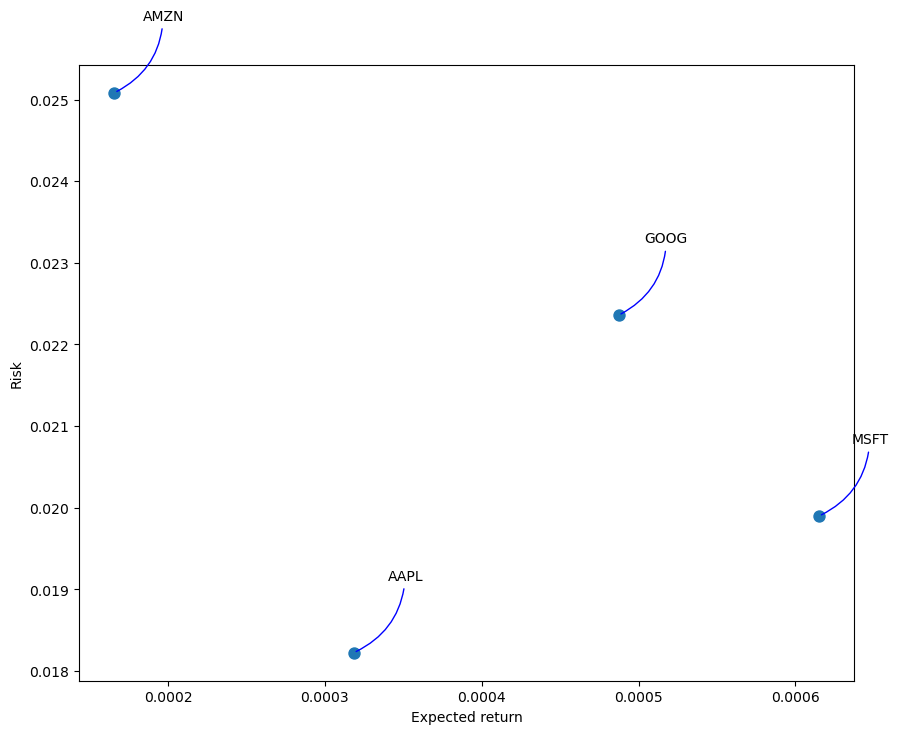

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

Semms like the safest company is Apple, and a bit riskier but with double beneficts Microsoft. We will try to predict how the stock price of Microsoft will evolve.

<h1><b>Stock Price Prediction for Microsoft

[*********************100%***********************]  1 of 1 completed


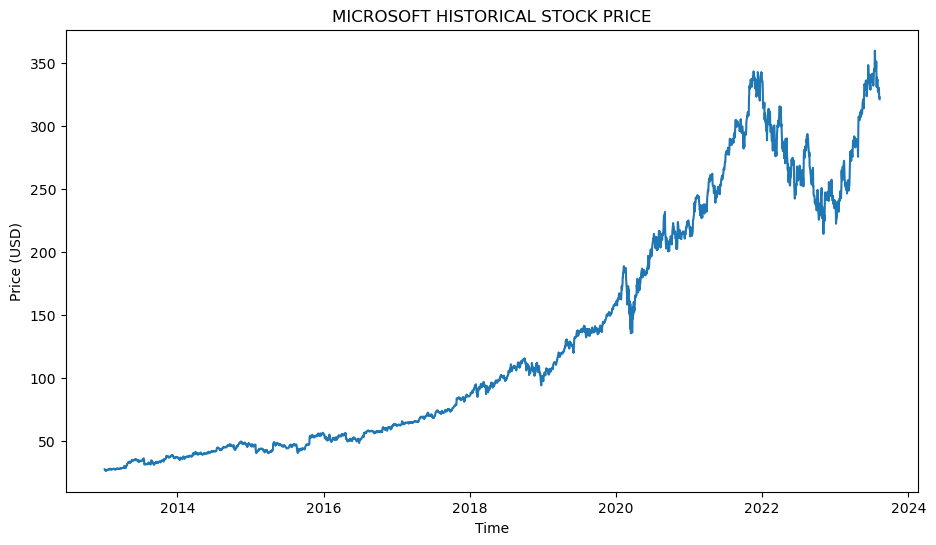

In [490]:
# Get the stock quote
df = pdr.get_data_yahoo('MSFT', start='2013-01-01', end=datetime.now())

plt.figure(figsize=(11, 6))
plt.plot(df.index, df.Close)
plt.title('MICROSOFT HISTORICAL STOCK PRICE')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.show()

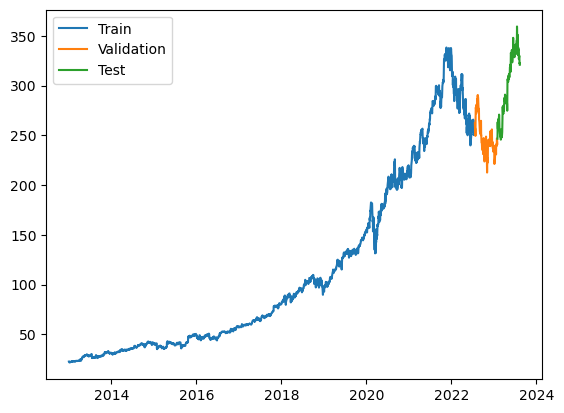

In [491]:
#to be able to tune the model, we divide the dataset on train-val-test sets.
df.reset_index(inplace=True)
df = df[['Date','Adj Close']]  #for modelling, we will only focus on the adjusted close price of the asset.
df.index = df.pop('Date') #we make Date the index
train = df[:round(len(df)*0.9)] #90%
validation = df[round(len(df)*0.9):round(len(df)*0.95)] #5%
test = df[round(len(df)*0.95):] #5%
plt.plot(train)
plt.plot(validation)
plt.plot(test)
plt.legend(['Train', 'Validation', 'Test'])

In [492]:
#we scale the dataset to help the model
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train) #we only train the scaler with the train dataset, because the model should not be influenced by test sets
scaled_train = scaler.transform(train)
scaled_val = scaler.transform(validation)
scaled_test = scaler.transform(test)

In [493]:
from keras.preprocessing.sequence import TimeseriesGenerator
#for creating an understandable dataset for the model

n_input = 5
n_features = 1                 #data          #target    #info of how many days #how much it predicts
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

generator_val = TimeseriesGenerator(scaled_val, scaled_val, length = n_input, batch_size = 1)

X,y = generator[0] #lets check if has the structure we want
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')
print()

X,y = generator[1] #lets check if has the structure we want
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')


Given the Array: 
[0.00300687 0.00204778 0.00072581 0.00059621 0.0002333 ]
Predict this y: 
 [[0.00062213]]

Given the Array: 
[0.00204778 0.00072581 0.00059621 0.0002333  0.00062213]
Predict this y: 
 [[0.]]


The structure is well, because the first generator picks the first 5 records of the scaled_train dataset, and tries to predict the sixth. And the sencond generator does the same, but starting on the next record, the second record.

We will use keras_tunes functionality from keras package, to help us decide on the structure of the RNN and to adjust the RNNs hyperparameters.

First we write the structure that we want to tune:

In [514]:
import tensorflow as tf
from keras import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

def modelo_lstm(hp):
    n_input = 5
    n_features = 1   
    model = Sequential()
#     model.add(Flatten(input_shape=(7,1)))
    model.add(LSTM(hp.Choice('units',[2**6,2**7]), activation = 'relu', return_sequences=True, input_shape=(n_input,n_features)))
    if hp.Boolean('dropout'):
        model.add(Dropout(rate=0.25))
    model.add(LSTM(hp.Choice('units',[2**5,2**6]), activation = 'relu',return_sequences=False))
    if hp.Boolean('dropout1'):
        model.add(Dropout(rate=0.25))
    model.add(Dense(hp.Choice('units1',[2**3,2**4,2**5]), hp.Choice('activation', ['relu','tanh','linear'])))
    # model.add(Dense(2**4, activation='relu'))
    # if hp.Boolean('dropout1'):
    #     model.add(Dropout(rate=0.25))
    model.add(Dense(1)) #output
    learning_rate = hp.Float('lr', min_value=1e-4, max_value=0.5, sampling = 'log')
#     learning_rate = 1e-3
    model.compile(optimizer = Adam(learning_rate = learning_rate), loss = 'mse', metrics = ['mean_absolute_error'])
    return model

Now we will start checking which structure tunes it more appropiately.

In [515]:
import keras_tuner as kt
tuner = kt.Hyperband(modelo_lstm, objective = 'val_loss', max_epochs = 10, factor = 3, overwrite = True, seed = 1)
stop_early = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5)
tuner.search(generator, epochs=50, validation_data = generator_val, callbacks = [stop_early])

Trial 30 Complete [00h 01m 42s]
val_loss: 0.0005958595429547131

Best val_loss So Far: 0.0004979152581654489
Total elapsed time: 00h 34m 21s
INFO:tensorflow:Oracle triggered exit


In [516]:
best_hyp = tuner.get_best_hyperparameters(num_trials=2)[0]
tuner.results_summary()

Results summary
Results in .\untitled_project
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0027 summary
Hyperparameters:
units: 128
dropout: True
dropout1: False
units1: 32
activation: linear
lr: 0.00803045302461741
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.0004979152581654489

Trial 0024 summary
Hyperparameters:
units: 64
dropout: False
dropout1: False
units1: 8
activation: tanh
lr: 0.00035324892422378584
tuner/epochs: 10
tuner/initial_epoch: 4
tuner/bracket: 1
tuner/round: 1
tuner/trial_id: 0022
Score: 0.0005358633352443576

Trial 0029 summary
Hyperparameters:
units: 64
dropout: True
dropout1: True
units1: 16
activation: relu
lr: 0.0033539907531651026
tuner/epochs: 10
tuner/initial_epoch: 0
tuner/bracket: 0
tuner/round: 0
Score: 0.0005958595429547131

Trial 0022 summary
Hyperparameters:
units: 64
dropout: False
dropout1: False
units1: 8
activation: tanh
lr: 0.00035324892422378584
tuner/epochs: 4
tuner/initial_epoch: 

Once we have the best model, we will train it:

In [517]:
modelo_final = tuner.hypermodel.build(best_hyp)
history = modelo_final.fit(generator, epochs=50, validation_data = generator_val, shuffle=True)

Epoch 1/50
2399/2399 [==============================] - 15s 6ms/step - loss: 0.0092 - mean_absolute_error: 0.0545 - val_loss: 0.0011 - val_mean_absolute_error: 0.0277
Epoch 2/50
2399/2399 [==============================] - 13s 6ms/step - loss: 0.0032 - mean_absolute_error: 0.0404 - val_loss: 0.0232 - val_mean_absolute_error: 0.1502
Epoch 3/50
2399/2399 [==============================] - 13s 5ms/step - loss: 0.0026 - mean_absolute_error: 0.0365 - val_loss: 0.0060 - val_mean_absolute_error: 0.0727
Epoch 4/50
2399/2399 [==============================] - 11s 5ms/step - loss: 0.0018 - mean_absolute_error: 0.0310 - val_loss: 0.0089 - val_mean_absolute_error: 0.0912
Epoch 5/50
2399/2399 [==============================] - 11s 5ms/step - loss: 0.0017 - mean_absolute_error: 0.0301 - val_loss: 6.3980e-04 - val_mean_absolute_error: 0.0205
Epoch 6/50
2399/2399 [==============================] - 11s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0270 - val_loss: 5.8120e-04 - val_mean_absolute_erro

Lets visualize the RNN performance:

Text(0.5, 1.0, 'Validation Loss')

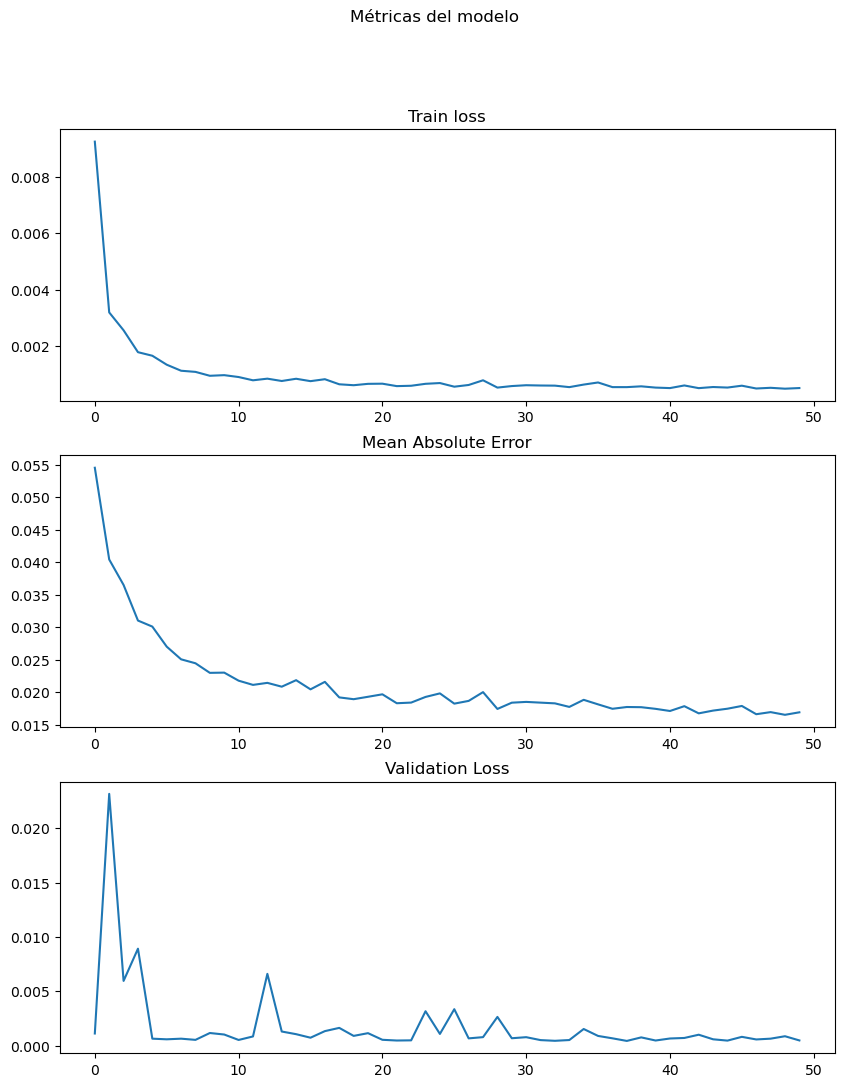

In [518]:
loss_per_epoch = modelo_final.history.history['loss']
mae_epoch = modelo_final.history.history['mean_absolute_error']
val_loss_epoch = modelo_final.history.history['val_loss']

fig, ax = plt.subplots(3,figsize=(10,12))
fig.suptitle('Métricas del modelo')
ax[0].plot(range(len(loss_per_epoch)),loss_per_epoch)
ax[0].set_title('Train loss')
ax[1].plot(range(len(mae_epoch)),mae_epoch)
ax[1].set_title('Mean Absolute Error')
ax[2].plot(range(len(val_loss_epoch)),val_loss_epoch)
ax[2].set_title('Validation Loss')

We can see a clear drop of train set, and also from validation set. Now we will see how predicts in the test set.

In [519]:
#for predicting from test set:
test_predictions = []
np_pred = np.concatenate((scaled_val[-n_input:], scaled_test))
first_eval_batch = np_pred[:n_input]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
# model_1
for i in range(len(test)):
    
    current_pred = modelo_final.predict(current_batch)[0]
#     print(current_pred)
    test_predictions.append(current_pred)
#     print(test_predictions)
    current_batch = np.append(current_batch[:,1:,:],np_pred[n_input+i:n_input+i+1].reshape((1, 1, n_features)),axis=1)

1/1 [==============================] - 0s 16ms/step


We undo our scaler transformation:

             Adj Close        Pred
Date                              
2023-01-31  246.651672  246.412443
2023-02-01  251.568573  248.099884
2023-02-02  263.363190  250.687311
2023-02-03  257.142395  257.179564
2023-02-06  255.569778  258.472033


C:\Users\achira03\AppData\Local\Temp\ipykernel_21552\3828187198.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Pred'] = scaler.inverse_transform(test_predictions)


<AxesSubplot: xlabel='Date'>

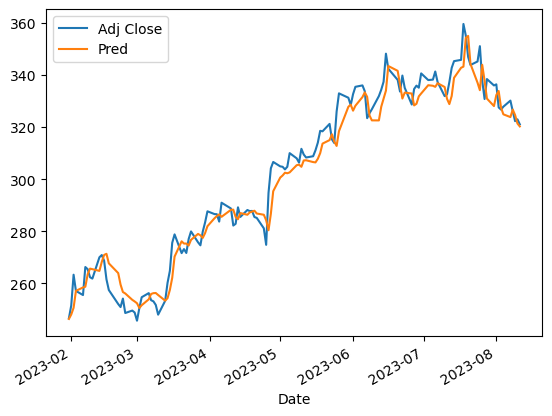

In [520]:
test['Pred'] = scaler.inverse_transform(test_predictions)
print(test.head())
test.plot()

In [521]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error

print('R2 score:', r2_score(test['Adj Close'], test['Pred']))
print('MSE: ', mean_squared_error(test['Adj Close'], test['Pred']))
print('MAPE', mean_absolute_percentage_error(test['Adj Close'], test['Pred'])*100, '%')

R2 score: 0.9636985256889734
MSE:  38.94550596462426
MAPE 1.627326829198681 %


As we can see from the graph and from the metrics, our model works perfectly fine. Predicts the next days price with great precision. So, with this model, we can start trading on high-frequency levels.